In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


# <center>One Successful Amon-Ra St. Brown Play</center>

### <center>First things first, gotta load in the data and I want to explore the data for Amon-Ra St. Brown first and then try to extrapolate from there</center>

In [2]:
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/games.csv")
players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/players.csv')
player_play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/player_play.csv')
plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')
tracking_week_2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv")
players[players['displayName'] == 'Amon-Ra St. Brown']

nflId height  weight birthDate          collegeName position  \
1328  53541    6-1     195       NaN  Southern California       WR   

            displayName  
1328  Amon-Ra St. Brown

### <center>Here are all the pass receptions and rushes that St.Brown had in the game against the Commanders</center>

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 1.0) | (player_play['hadPassReception'] == 1.0)) & 
            (player_play['gameId'] == 2022091802)]

gameId  playId  nflId teamAbbr  hadRushAttempt  rushingYards  \
50940  2022091802      56  53541      DET               0             0   
51116  2022091802     316  53541      DET               0             0   
51182  2022091802     390  53541      DET               0             0   
51468  2022091802     817  53541      DET               0             0   
51798  2022091802    1303  53541      DET               0             0   
52038  2022091802    1646  53541      DET               0             0   
52546  2022091802    2401  53541      DET               0             0   
52744  2022091802    2710  53541      DET               1            58   
53162  2022091802    3262  53541      DET               0             0   
53206  2022091802    3310  53541      DET               0             0   
53558  2022091802    3800  53541      DET               1            10   

       hadDropback  passingYards  sackYardsAsOffense  hadPassReception  \
50940            0             0                   0                 1   
51116            0             0                   0                 1   
51182            0             0                   0                 1   
51468            0             0                   0                 1   
51798            0             0                   0                 1   
52038            0             0                   0                 1   
52546            0             0                   0                 1   
52744            0             0                   0                 0   
53162            0             0                   0                 1   
53206            0             0                   0                 1   
53558            0             0                   0                 0   

       receivingYards  wasTargettedReceiver  yardageGainedAfterTheCatch  \
50940               3                     1                           6   
51116              49                     1                          38   
51182               6                     1                           1   
51468              13                     1                           0   
51798              11                     1                           5   
52038               4                     1                           0   
52546              11                     1                           2   
52744               0                     0                           0   
53162               8                     1                           4   
53206              11                     1                           0   
53558               0                     0                           0   

       fumbles  fumbleLost  fumbleOutOfBounds  assistedTackle  \
50940        0           0                  0               0   
51116        0           0                  0               0   
51182        0           0                  0               0   
51468        0           0                  0               0   
51798        0           0                  0               0   
52038        0           0                  0               0   
52546        0           0                  0               0   
52744        0           0                  0               0   
53162        0           0                  0               0   
53206        0           0                  0               0   
53558        0           0                  0               0   

       forcedFumbleAsDefense  halfSackYardsAsDefense  passDefensed  \
50940                      0                       0             0   
51116                      0                       0             0   
51182                      0                       0             0   
51468                      0                       0             0   
51798                      0                       0             0   
52038                      0                       0             0   
52546                      0                     

### <center>Here is the specific play that I decided to use to test Plotly</center>

In [4]:
plays[(plays['playId'] == 2710) & (plays['gameId'] == 2022091802)]

gameId  playId  \
6533  2022091802    2710   

                                                                  playDescription  \
6533  (2:58) A.St. Brown right end pushed ob at WAS 17 for 58 yards (B.St-Juste).   

      quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
6533        3     1         10            DET           WAS          DET   

      yardlineNumber gameClock  preSnapHomeScore  preSnapVisitorScore  \
6533              25     02:58                22                   15   

     playNullifiedByPenalty  absoluteYardlineNumber  \
6533                      N                      35   

      preSnapHomeTeamWinProbability  preSnapVisitorTeamWinProbability  \
6533                       0.797227                          0.202773   

      expectedPoints offenseFormation receiverAlignment  playClockAtSnap  \
6533        1.226062       SINGLEBACK               3x1             12.0   

     passResult  passLength  targetX  targetY  playAction dropbackType  \
6533        NaN         NaN      NaN      NaN       False          NaN   

      dropbackDistance passLocationType  timeToThrow  timeInTackleBox  \
6533               NaN              NaN          NaN              NaN   

      timeToSack passTippedAtLine unblockedPressure qbSpike  qbKneel qbSneak  \
6533         NaN              NaN               NaN     NaN        0   False   

     rushLocationType  penaltyYards  prePenaltyYardsGained  yardsGained  \
6533    OUTSIDE_RIGHT           NaN                     58           58   

      homeTeamWinProbabilityAdded  visitorTeamWinProbilityAdded  \
6533                     0.070197                     -0.070197   

      expectedPointsAdded  isDropback pff_runConceptPrimary  \
6533             3.804456       False                 TRICK   

     pff_runConceptSecondary  pff_runPassOption pff_passCoverage pff_manZone  
6533                     NaN                  0          Cover-3        Zone

In [5]:
full_play = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 3800)]
full_play

gameId  playId    nflId   displayName  frameId    frameType  \
5381862  2022091802    3800  42488.0  Bobby McCain        1  BEFORE_SNAP   
5381863  2022091802    3800  42488.0  Bobby McCain        2  BEFORE_SNAP   
5381864  2022091802    3800  42488.0  Bobby McCain        3  BEFORE_SNAP   
5381865  2022091802    3800  42488.0  Bobby McCain        4  BEFORE_SNAP   
5381866  2022091802    3800  42488.0  Bobby McCain        5  BEFORE_SNAP   
...             ...     ...      ...           ...      ...          ...   
5385284  2022091802    3800      NaN      football      145   AFTER_SNAP   
5385285  2022091802    3800      NaN      football      146   AFTER_SNAP   
5385286  2022091802    3800      NaN      football      147   AFTER_SNAP   
5385287  2022091802    3800      NaN      football      148   AFTER_SNAP   
5385288  2022091802    3800      NaN      football      149   AFTER_SNAP   

                          time  jerseyNumber      club playDirection  \
5381862  2022-09-18 20:00:17.2          20.0       WAS          left   
5381863  2022-09-18 20:00:17.3          20.0       WAS          left   
5381864  2022-09-18 20:00:17.4          20.0       WAS          left   
5381865  2022-09-18 20:00:17.5          20.0       WAS          left   
5381866  2022-09-18 20:00:17.6          20.0       WAS          left   
...                        ...           ...       ...           ...   
5385284  2022-09-18 20:00:31.6           NaN  football          left   
5385285  2022-09-18 20:00:31.7           NaN  football          left   
5385286  2022-09-18 20:00:31.8           NaN  football          left   
5385287  2022-09-18 20:00:31.9           NaN  football          left   
5385288    2022-09-18 20:00:32           NaN  football          left   

                 x      y     s     a   dis      o     dir  \
5381862  45.150000  25.96  0.12  0.02  0.01  75.63  342.28   
5381863  45.160000  25.98  0.12  0.03  0.01  74.23  348.22   
5381864  45.160000  25.98  0.11  0.05  0.01  74.23  350.67   
5381865  45.150000  26.01  0.14  0.07  0.03  75.04  351.98   
5381866  45.150000  26.02  0.13  0.07  0.01  75.04  351.74   
...            ...    ...   ...   ...   ...    ...     ...   
5385284  42.349998  13.75  2.56  4.35  0.21    NaN     NaN   
5385285  42.189999  13.86  1.90  4.60  0.19    NaN     NaN   
5385286  42.049999  13.98  1.54  4.35  0.18    NaN     NaN   
5385287  41.959999  14.07  1.16  3.98  0.14    NaN     NaN   
5385288  41.900002  14.17  0.78  3.68  0.11    NaN     NaN   

                        event  
5381862  huddle_break_offense  
5381863                   NaN  
5381864                   NaN  
5381865                   NaN  
5381866                   NaN  
...                       ...  
5385284                tackle  
5385285                   NaN  
5385286                   NaN  
5385287                   NaN  
5385288                   NaN  

[3427 rows x 18 columns]

### <center>Here is my attempt at a plotly graph object, these things get crazy complex, but it seems to work well so far</center>

In [6]:
import plotly.graph_objects as go


fig_dict = {
    'data': [],
    'layout': {},
    'frames': []
}

fig_dict['layout']['xaxis'] = {
    'range': [0, 100],
    'title': {'text': 'x', 'font': {'color': 'white'}},  
    'linecolor': 'black',  
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': True 
}

fig_dict['layout']['yaxis'] = {
    'range': [0, 50],
    'title': {'text': 'y', 'font': {'color': 'white'}},
    'linecolor': 'black', 
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': False  
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['font'] = {'color': 'white'} 
fig_dict['layout']['updatemenus'] = [
    {
        "buttons": [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': False},
                                'fromcurrent': True, 'transition': {'duration': 1000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20, 'color': 'black'},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300},
    'pad': {'b': 10, 't': 50},
    'len': .9,
    'x': .1,
    'y': 0,
    'steps': []
}

for club in full_play['club'].unique():
    data_dict = {
        'x': full_play.loc[full_play['club'] == club, 'x'],
        'y': full_play.loc[full_play['club'] == club, 'y'],
        'mode': 'markers',
        'text': full_play.loc[full_play['club'] == club, 'displayName'],
        'name': club
    }
    fig_dict['data'].append(data_dict)

initial_frame = {'data': [], 'name': 'Initial'}
fig_dict['frames'].append(initial_frame)

for frame in full_play['frameId'].unique():
    f = {'data': [], 'name': str(frame)}
    
    for club in full_play['club'].unique():
        frame_data = {
            'x': full_play.loc[full_play['frameId'] == frame, 'x'][full_play['club'] == club],
            'y': full_play.loc[full_play['frameId'] == frame, 'y'][full_play['club'] == club],
            'mode': 'markers',
            'text': full_play.loc[full_play['frameId'] == frame, 'displayName'][full_play['club'] == club],
            'name': club
        }
        f['data'].append(frame_data) 

    fig_dict['frames'].append(f)
    
    slider_step = {
        'args': [
            [frame],
            {'frame': {'duration': 0, 'redraw': False},
             'mode': 'immediate',
             'transition': {'duration': 0}}
        ],
        'label': str(frame),
        'method': 'animate'
    }
    sliders_dict['steps'].append(slider_step) 

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

if len(fig_dict['frames']) > 1:
    fig.update(data=fig_dict['frames'][1]['data']) 

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200')
    
fig.show()


------------

------------

# <center>All Successful Amon-Ra St. Brown Plays</center>

### <center>Now, this part is to get all the plays to be centered around the origin (0,0) so that I could make a heatmap of where most players move to.</center>

In [7]:
wsh_game = player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 1.0) | (player_play['hadPassReception'] == 1.0)) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy()
wsh_game = wsh_game.tolist()

amon_ra_plays = tracking_week_2[(tracking_week_2['playId'].isin(wsh_game)) & 
                                ((tracking_week_2['club'] == 'DET') | 
                                 (tracking_week_2['club'] == 'football'))]
amon_ra_plays[amon_ra_plays['club'] == 'football']

gameId  playId  nflId displayName  frameId    frameType  \
767574   2022091812      56    NaN    football        1  BEFORE_SNAP   
767575   2022091812      56    NaN    football        2  BEFORE_SNAP   
767576   2022091812      56    NaN    football        3  BEFORE_SNAP   
767577   2022091812      56    NaN    football        4  BEFORE_SNAP   
767578   2022091812      56    NaN    football        5  BEFORE_SNAP   
...             ...     ...    ...         ...      ...          ...   
5385284  2022091802    3800    NaN    football      145   AFTER_SNAP   
5385285  2022091802    3800    NaN    football      146   AFTER_SNAP   
5385286  2022091802    3800    NaN    football      147   AFTER_SNAP   
5385287  2022091802    3800    NaN    football      148   AFTER_SNAP   
5385288  2022091802    3800    NaN    football      149   AFTER_SNAP   

                          time  jerseyNumber      club playDirection  \
767574   2022-09-19 00:23:09.1           NaN  football          left   
767575   2022-09-19 00:23:09.2           NaN  football          left   
767576   2022-09-19 00:23:09.3           NaN  football          left   
767577   2022-09-19 00:23:09.4           NaN  football          left   
767578   2022-09-19 00:23:09.5           NaN  football          left   
...                        ...           ...       ...           ...   
5385284  2022-09-18 20:00:31.6           NaN  football          left   
5385285  2022-09-18 20:00:31.7           NaN  football          left   
5385286  2022-09-18 20:00:31.8           NaN  football          left   
5385287  2022-09-18 20:00:31.9           NaN  football          left   
5385288    2022-09-18 20:00:32           NaN  football          left   

                 x          y     s     a   dis   o  dir                 event  
767574   85.269997  29.809999  0.00  0.00  0.00 NaN  NaN  huddle_break_offense  
767575   85.269997  29.809999  0.00  0.00  0.00 NaN  NaN                   NaN  
767576   85.269997  29.809999  0.00  0.00  0.00 NaN  NaN                   NaN  
767577   85.269997  29.809999  0.00  0.00  0.00 NaN  NaN                   NaN  
767578   85.279999  29.809999  0.00  0.00  0.00 NaN  NaN                   NaN  
...            ...        ...   ...   ...   ...  ..  ...                   ...  
5385284  42.349998  13.750000  2.56  4.35  0.21 NaN  NaN                tackle  
5385285  42.189999  13.860000  1.90  4.60  0.19 NaN  NaN                   NaN  
5385286  42.049999  13.980000  1.54  4.35  0.18 NaN  NaN                   NaN  
5385287  41.959999  14.070000  1.16  3.98  0.14 NaN  NaN                   NaN  
5385288  41.900002  14.170000  0.78  3.68  0.11 NaN  NaN                   NaN  

[3140 rows x 18 columns]

### <center>This is where I changed all the coordinates of the players to be centered around (0,0)</center>

In [8]:
current_df = pd.DataFrame()

for play in wsh_game:
    df_tobeadded = amon_ra_plays[(amon_ra_plays['playId'] == play) & (amon_ra_plays['frameType'] == 'BEFORE_SNAP') & (amon_ra_plays['gameId'] == 2022091802)]
    condition = ((df_tobeadded['frameId'] == 1) & 
                 (df_tobeadded['club'] == 'football'))
    value_x = df_tobeadded.loc[condition, 'x'].iat[0]
    value_y = df_tobeadded.loc[condition, 'y'].iat[0]
    
    df_tobeadded['x'] = df_tobeadded['x'].apply(lambda x: x - value_x)
    df_tobeadded['y'] = df_tobeadded['y'].apply(lambda y: y - value_y)
    
    current_df = pd.concat([current_df, df_tobeadded])

current_df

/tmp/ipykernel_17/4023174559.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_17/4023174559.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



gameId  playId    nflId displayName  frameId    frameType  \
4936581  2022091802      56  43290.0  Jared Goff        1  BEFORE_SNAP   
4936582  2022091802      56  43290.0  Jared Goff        2  BEFORE_SNAP   
4936583  2022091802      56  43290.0  Jared Goff        3  BEFORE_SNAP   
4936584  2022091802      56  43290.0  Jared Goff        4  BEFORE_SNAP   
4936585  2022091802      56  43290.0  Jared Goff        5  BEFORE_SNAP   
...             ...     ...      ...         ...      ...          ...   
5385233  2022091802    3800      NaN    football       94  BEFORE_SNAP   
5385234  2022091802    3800      NaN    football       95  BEFORE_SNAP   
5385235  2022091802    3800      NaN    football       96  BEFORE_SNAP   
5385236  2022091802    3800      NaN    football       97  BEFORE_SNAP   
5385237  2022091802    3800      NaN    football       98  BEFORE_SNAP   

                          time  jerseyNumber      club playDirection  \
4936581  2022-09-18 17:03:18.3          16.0       DET         right   
4936582  2022-09-18 17:03:18.4          16.0       DET         right   
4936583  2022-09-18 17:03:18.5          16.0       DET         right   
4936584  2022-09-18 17:03:18.6          16.0       DET         right   
4936585  2022-09-18 17:03:18.7          16.0       DET         right   
...                        ...           ...       ...           ...   
5385233  2022-09-18 20:00:26.5           NaN  football          left   
5385234  2022-09-18 20:00:26.6           NaN  football          left   
5385235  2022-09-18 20:00:26.7           NaN  football          left   
5385236  2022-09-18 20:00:26.8           NaN  football          left   
5385237  2022-09-18 20:00:26.9           NaN  football          left   

                x         y     s     a   dis       o     dir  \
4936581 -6.010001  0.430001  0.52  0.99  0.05  127.60  135.70   
4936582 -5.970001  0.390001  0.59  0.77  0.06  123.70  135.51   
4936583 -5.930001  0.340001  0.66  0.49  0.06  119.42  133.79   
4936584 -5.880001  0.300001  0.68  0.22  0.07  118.43  131.05   
4936585 -5.820001  0.260001  0.69  0.10  0.07  116.81  126.20   
...           ...       ...   ...   ...   ...     ...     ...   
5385233  0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385234  0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385235  0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385236  0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385237  0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   

                        event  
4936581  huddle_break_offense  
4936582                   NaN  
4936583                   NaN  
4936584                   NaN  
4936585                   NaN  
...                       ...  
5385233                   NaN  
5385234                   NaN  
5385235                   NaN  
5385236                   NaN  
5385237                   NaN  

[15228 rows x 18 columns]

In [9]:
import plotly.express as px

fig = px.scatter(current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

### <center>Finally, I was able to switch the plays going from right to left to left to right</center>

In [10]:
current_df['x']= current_df[current_df['playDirection'] == 'left']['x'].apply(lambda x: -abs(x))
current_df[current_df['playDirection'] == 'left']

gameId  playId    nflId displayName  frameId    frameType  \
5092675  2022091802    1303  43290.0  Jared Goff        1  BEFORE_SNAP   
5092676  2022091802    1303  43290.0  Jared Goff        2  BEFORE_SNAP   
5092677  2022091802    1303  43290.0  Jared Goff        3  BEFORE_SNAP   
5092678  2022091802    1303  43290.0  Jared Goff        4  BEFORE_SNAP   
5092679  2022091802    1303  43290.0  Jared Goff        5  BEFORE_SNAP   
...             ...     ...      ...         ...      ...          ...   
5385233  2022091802    3800      NaN    football       94  BEFORE_SNAP   
5385234  2022091802    3800      NaN    football       95  BEFORE_SNAP   
5385235  2022091802    3800      NaN    football       96  BEFORE_SNAP   
5385236  2022091802    3800      NaN    football       97  BEFORE_SNAP   
5385237  2022091802    3800      NaN    football       98  BEFORE_SNAP   

                          time  jerseyNumber      club playDirection  \
5092675  2022-09-18 18:02:02.6          16.0       DET          left   
5092676  2022-09-18 18:02:02.7          16.0       DET          left   
5092677  2022-09-18 18:02:02.8          16.0       DET          left   
5092678  2022-09-18 18:02:02.9          16.0       DET          left   
5092679    2022-09-18 18:02:03          16.0       DET          left   
...                        ...           ...       ...           ...   
5385233  2022-09-18 20:00:26.5           NaN  football          left   
5385234  2022-09-18 20:00:26.6           NaN  football          left   
5385235  2022-09-18 20:00:26.7           NaN  football          left   
5385236  2022-09-18 20:00:26.8           NaN  football          left   
5385237  2022-09-18 20:00:26.9           NaN  football          left   

                x         y     s     a   dis       o     dir  \
5092675 -5.160001 -0.179999  0.55  0.37  0.05  294.85  334.34   
5092676 -5.130001 -0.129999  0.60  0.38  0.06  283.96  335.64   
5092677 -5.110001 -0.079999  0.58  0.32  0.06  272.60  341.09   
5092678 -5.100001 -0.019999  0.53  0.43  0.06  256.51  347.39   
5092679 -5.090001  0.030001  0.49  0.49  0.05  245.39  351.18   
...           ...       ...   ...   ...   ...     ...     ...   
5385233 -0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385234 -0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385235 -0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385236 -0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   
5385237 -0.010002  0.039999  0.00  0.00  0.00     NaN     NaN   

                        event  
5092675  huddle_break_offense  
5092676                   NaN  
5092677                   NaN  
5092678                   NaN  
5092679                   NaN  
...                       ...  
5385233                   NaN  
5385234                   NaN  
5385235                   NaN  
5385236                   NaN  
5385237                   NaN  

[7908 rows x 18 columns]

In [11]:
fig = px.scatter(current_df, animation_frame='frameId', color='displayName', animation_group='playId',
           x='x', y='y', hover_name='nflId', range_x=[-50,50], range_y=[-25,25])

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200', font={'color':'#FFFFFF'})

fig

--------

--------

# <center>Heatmap attempt</center>

In [12]:
import matplotlib.pyplot as plt

plt.hist2d(current_df['x'], current_df['y'], bins=[np.arange(-20,20,1), np.arange(-20,20,1)], cmax=550, cmap='inferno')
plt.show()

### <center>So now, this does not tell me much information. It maybe that I just need to specify on WRs, but let's see what focusing on just Amon-Ra St.Brown does</center>

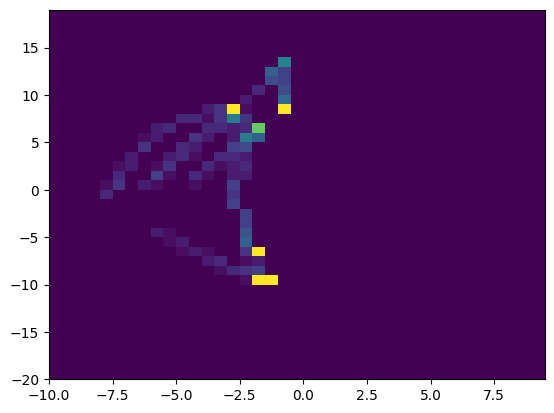

In [13]:
import matplotlib.colors as mcolors

plt.hist2d(current_df[current_df['nflId'] == 53541]['x'], current_df[current_df['nflId'] == 53541]['y'], bins=[np.arange(-10,10,.5), np.arange(-20,20,1)], cmap='viridis', density=True, norm=mcolors.Normalize(vmin=0, vmax=.08))
plt.show()

### <center>Now, we are seeing something here (might not be useful), but St. Brown likes to be near the bottom of the field rather than the top. We can also see some of the movement he does going p or down from his original position (can't see the direction of movement)</center>

### <center>So now we need to try to see a difference between those that Amon-Ra St. Brown had a rush or pass attempt to those where he did not. Now I just need to do decide to do exclusively plays where Amon-Ra St. Brown was targeted, plays where it was a pass, or all plays where he was on the field</center>

In [14]:
non_wsh_game = player_play[(player_play['nflId'] == 53541) & 
            ((player_play['hadRushAttempt'] == 0) | (player_play['hadPassReception'] == 0)) & 
            (player_play['gameId'] == 2022091802)]['playId'].to_numpy()

non_wsh_game.tolist()

non_amon_ra = tracking_week_2[(tracking_week_2['playId'].isin(non_wsh_game)) & 
                                ((tracking_week_2['club'] == 'DET') | 
                                 (tracking_week_2['club'] == 'football'))]
non_amon_ra[non_amon_ra['club'] == 'DET']

gameId  playId    nflId        displayName  frameId    frameType  \
4936581  2022091802      56  43290.0         Jared Goff        1  BEFORE_SNAP   
4936582  2022091802      56  43290.0         Jared Goff        2  BEFORE_SNAP   
4936583  2022091802      56  43290.0         Jared Goff        3  BEFORE_SNAP   
4936584  2022091802      56  43290.0         Jared Goff        4  BEFORE_SNAP   
4936585  2022091802      56  43290.0         Jared Goff        5  BEFORE_SNAP   
...             ...     ...      ...                ...      ...          ...   
5387784  2022091802    3828  53541.0  Amon-Ra St. Brown      121   AFTER_SNAP   
5387785  2022091802    3828  53541.0  Amon-Ra St. Brown      122   AFTER_SNAP   
5387786  2022091802    3828  53541.0  Amon-Ra St. Brown      123   AFTER_SNAP   
5387787  2022091802    3828  53541.0  Amon-Ra St. Brown      124   AFTER_SNAP   
5387788  2022091802    3828  53541.0  Amon-Ra St. Brown      125   AFTER_SNAP   

                          time  jerseyNumber club playDirection      x      y  \
4936581  2022-09-18 17:03:18.3          16.0  DET         right  28.80  24.39   
4936582  2022-09-18 17:03:18.4          16.0  DET         right  28.84  24.35   
4936583  2022-09-18 17:03:18.5          16.0  DET         right  28.88  24.30   
4936584  2022-09-18 17:03:18.6          16.0  DET         right  28.93  24.26   
4936585  2022-09-18 17:03:18.7          16.0  DET         right  28.99  24.22   
...                        ...           ...  ...           ...    ...    ...   
5387784  2022-09-18 20:01:48.6          14.0  DET          left  37.24  24.13   
5387785  2022-09-18 20:01:48.7          14.0  DET          left  36.99  24.80   
5387786  2022-09-18 20:01:48.8          14.0  DET          left  36.74  25.42   
5387787  2022-09-18 20:01:48.9          14.0  DET          left  36.49  26.01   
5387788    2022-09-18 20:01:49          14.0  DET          left  36.25  26.55   

            s     a   dis       o     dir                    event  
4936581  0.52  0.99  0.05  127.60  135.70     huddle_break_offense  
4936582  0.59  0.77  0.06  123.70  135.51                      NaN  
4936583  0.66  0.49  0.06  119.42  133.79                      NaN  
4936584  0.68  0.22  0.07  118.43  131.05                      NaN  
4936585  0.69  0.10  0.07  116.81  126.20                      NaN  
...       ...   ...   ...     ...     ...                      ...  
5387784  7.16  0.92  0.72   16.51  340.62  pass_outcome_incomplete  
5387785  7.05  1.39  0.71    8.07  339.33                      NaN  
5387786  6.75  2.20  0.68  359.23  337.82                      NaN  
5387787  6.33  3.08  0.64  346.37  336.36                      NaN  
5387788  5.78  3.85  0.59  353.66  335.22                      NaN  

[93709 rows x 18 columns]

In [15]:
test = tracking_week_2[(tracking_week_2["gameId"] == 2022091802) & (tracking_week_2["playId"] == 3828)]
test

gameId  playId    nflId   displayName  frameId    frameType  \
5385289  2022091802    3828  42488.0  Bobby McCain        1  BEFORE_SNAP   
5385290  2022091802    3828  42488.0  Bobby McCain        2  BEFORE_SNAP   
5385291  2022091802    3828  42488.0  Bobby McCain        3  BEFORE_SNAP   
5385292  2022091802    3828  42488.0  Bobby McCain        4  BEFORE_SNAP   
5385293  2022091802    3828  42488.0  Bobby McCain        5  BEFORE_SNAP   
...             ...     ...      ...           ...      ...          ...   
5388159  2022091802    3828      NaN      football      121   AFTER_SNAP   
5388160  2022091802    3828      NaN      football      122   AFTER_SNAP   
5388161  2022091802    3828      NaN      football      123   AFTER_SNAP   
5388162  2022091802    3828      NaN      football      124   AFTER_SNAP   
5388163  2022091802    3828      NaN      football      125   AFTER_SNAP   

                          time  jerseyNumber      club playDirection  \
5385289  2022-09-18 20:01:36.6          20.0       WAS          left   
5385290  2022-09-18 20:01:36.7          20.0       WAS          left   
5385291  2022-09-18 20:01:36.8          20.0       WAS          left   
5385292  2022-09-18 20:01:36.9          20.0       WAS          left   
5385293    2022-09-18 20:01:37          20.0       WAS          left   
...                        ...           ...       ...           ...   
5388159  2022-09-18 20:01:48.6           NaN  football          left   
5388160  2022-09-18 20:01:48.7           NaN  football          left   
5388161  2022-09-18 20:01:48.8           NaN  football          left   
5388162  2022-09-18 20:01:48.9           NaN  football          left   
5388163    2022-09-18 20:01:49           NaN  football          left   

                 x          y     s     a   dis      o    dir  \
5385289  34.670000  26.640000  0.00  0.00  0.00  89.58   9.12   
5385290  34.670000  26.640000  0.00  0.00  0.00  88.60  11.23   
5385291  34.670000  26.650000  0.00  0.00  0.00  88.60  14.13   
5385292  34.670000  26.650000  0.00  0.00  0.00  86.73  17.24   
5385293  34.680000  26.660000  0.00  0.00  0.00  86.73  18.42   
...            ...        ...   ...   ...   ...    ...    ...   
5388159  37.349998  24.530001  6.21  0.57  0.63    NaN    NaN   
5388160  37.080002  25.070000  6.10  1.04  0.61    NaN    NaN   
5388161  36.810001  25.610001  5.85  1.83  0.60    NaN    NaN   
5388162  36.560001  26.120001  5.66  2.24  0.58    NaN    NaN   
5388163  36.340000  26.559999  5.11  3.15  0.49    NaN    NaN   

                           event  
5385289     huddle_break_offense  
5385290                      NaN  
5385291                      NaN  
5385292                      NaN  
5385293                      NaN  
...                          ...  
5388159  pass_outcome_incomplete  
5388160                      NaN  
5388161                      NaN  
5388162                      NaN  
5388163                      NaN  

[2875 rows x 18 columns]

In [16]:
import plotly.graph_objects as go


fig_dict = {
    'data': [],
    'layout': {},
    'frames': []
}

fig_dict['layout']['xaxis'] = {
    'range': [0, 100],
    'title': {'text': 'x', 'font': {'color': 'white'}},  
    'linecolor': 'black',  
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': True 
}

fig_dict['layout']['yaxis'] = {
    'range': [0, 50],
    'title': {'text': 'y', 'font': {'color': 'white'}},
    'linecolor': 'black', 
    'tickcolor': 'black',  
    'dtick': 10, 
    'showgrid': False  
}

fig_dict['layout']['hovermode'] = 'closest'
fig_dict['layout']['font'] = {'color': 'white'} 
fig_dict['layout']['updatemenus'] = [
    {
        "buttons": [
            {
                'args': [None, {'frame': {'duration': 50, 'redraw': False},
                                'fromcurrent': True, 'transition': {'duration': 1000}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False},
                                  'mode': 'immediate',
                                  'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20, 'color': 'black'},
        'prefix': 'Time:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300},
    'pad': {'b': 10, 't': 50},
    'len': .9,
    'x': .1,
    'y': 0,
    'steps': []
}

for club in test['club'].unique():
    data_dict = {
        'x': test.loc[test['club'] == club, 'x'],
        'y': test.loc[test['club'] == club, 'y'],
        'mode': 'markers',
        'text': test.loc[test['club'] == club, 'displayName'],
        'name': club
    }
    fig_dict['data'].append(data_dict)

initial_frame = {'data': [], 'name': 'Initial'}
fig_dict['frames'].append(initial_frame)

for frame in test['frameId'].unique():
    f = {'data': [], 'name': str(frame)}
    
    for club in test['club'].unique():
        frame_data = {
            'x': test.loc[test['frameId'] == frame, 'x'][test['club'] == club],
            'y': test.loc[test['frameId'] == frame, 'y'][test['club'] == club],
            'mode': 'markers',
            'text': test.loc[test['frameId'] == frame, 'displayName'][test['club'] == club],
            'name': club
        }
        f['data'].append(frame_data) 

    fig_dict['frames'].append(f)
    
    slider_step = {
        'args': [
            [frame],
            {'frame': {'duration': 0, 'redraw': False},
             'mode': 'immediate',
             'transition': {'duration': 0}}
        ],
        'label': str(frame),
        'method': 'animate'
    }
    sliders_dict['steps'].append(slider_step) 

fig_dict['layout']['sliders'] = [sliders_dict]

fig = go.Figure(fig_dict)

if len(fig_dict['frames']) > 1:
    fig.update(data=fig_dict['frames'][1]['data']) 

fig.update_layout(paper_bgcolor='#242424', plot_bgcolor='#0a4200')
    
fig.show()
